# Linear Regression

## Problem
Given the *training dataset* $x_i\in\mathbb{R}$, $y_i\in\mathbb{R}$, $i= 1,2,..., N$, we want to find the linear function 

$$ y\approx f(x) = wx + b $$ 

that fits the relations between $x_i$ and $y_i$. So that given any $x$, we can make the prediction 

$$ \hat{y} = w x+b $$



## Loss Function and Optimization

With the training dataset, define the loss function $L(w,b)$ of parameter $w$ and $b$, which is also called **mean squared error** (MSE) 

$$L(w,b)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y_i\big)^2=\frac{1}{N}\sum_{i=1}^N\big((wx_i+b)-y_i\big)^2,$$

where $\hat{y}^{(i)}$ denotes the predicted value of y at $x_i$, i.e. $\hat{y}^{(i)} = wx_i+b$.

Our goal is to find the optimal $w$ and $b$ that minimize the loss function $L(w,b)$, i.e.

$$\min_{w,b} L(w,b)$$


This is a function of $w$ and $b$, and we can analytically solve $\partial_{w}L = \partial_{b}L =0$, and yields

$$w^* = \frac{\sum_{i=1}^{N} (x_i - \bar{X})(y_i - \bar{Y})}{\sum_{i=1}^{N} (x_i - \bar{X})^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$$


$$b^* = \bar{Y}  - w^*\bar{X}$$

where $\bar{X}$ and $\bar{Y}$ are the mean of $x$ and of $y$, and $\text{Cov}(X,Y)$ denotes the estimated covariance (or called sample covariance) between $X$ and $Y$, $\text{Var}(Y)$ denotes the sample variance of $Y$.

## Evaluating the model

- MSE: The smaller MSE indicates better performance. 

MSE depends on the unit. For example, if we replace y[m] by y[mm], than MSE will be $1000^2$ times the original MSE.


- $R^{2}$ (coefficient of determination):
The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y_i-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y_i-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

Intuitively, MSE is the "unexplained" variance, and $R^{2}$ is the proportion of the variance that is explained by the model: 
If our model is perfect, then MSE is 0, and $R^{2}$ is 1.
If we are using a constant model, then our best prediction is the mean of $y$, and MSE is the variance of $y$, and $R^{2}$ is 0; 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class myLinearRegression:
    '''
    The single-variable linear regression estimator.
    This serves as an example of the regression models from sklearn, with methods fit, predict, and score.
    '''
    def __init__(self):
        '''
        '''
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        # covariance matrix, 
        # bias = True makes the factor 1/N, otherwise 1/(N-1)
        # but it doesn't matter here, since the factor will be cancelled out in the calculation of w
        
        cov_mat = np.cov(x, y, bias=True)
        # cov_mat[0, 1] is the covariance of x and y, and cov_mat[0, 0] is the variance of x

        self.w = cov_mat[0, 1] / cov_mat[0, 0]
        self.b = np.mean(y) - self.w * np.mean(x)

        # :.3f means 3 decimal places
        print(f'w = {self.w:.3f}, b = {self.b:.3f}')

    def predict(self, x):
        '''
        Predict the output values for the input value x, based on trained parameters

        '''
        ypred = self.w * x + self.b
        return ypred

    def score(self, x, y):
        '''
        Calculate the R^2 score of the model
        '''
        mse =  np.mean((y - self.predict(x))**2)
        var = np.mean((y - np.mean(y))**2)
        Rsquare = 1 - mse / var
        return Rsquare

w = 2.467, b = 0.462
score = 0.580


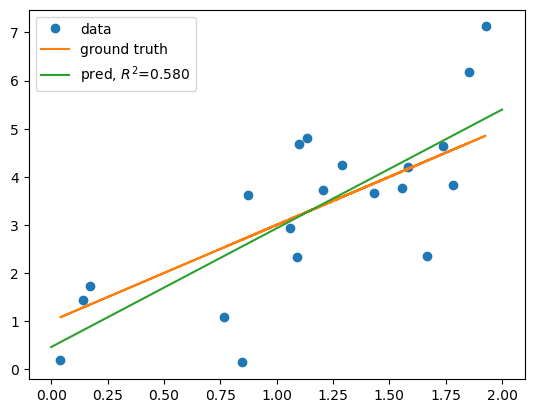

In [23]:
# Generate synthetic data

np.random.seed(0) # for reproducibility

a = 0
b = 2
N = 20

x = np.random.uniform(a,b,N)
y = 2 * x + 1 + np.random.randn(N)
y_gt = 2 * x + 1

# Fit the model
lm = myLinearRegression()
lm.fit(x, y)
score = lm.score(x, y)


# plot data
plt.plot(x, y, 'o', label='data')
# plot ground truth
plt.plot(x, y_gt, label='ground truth')


# plot the linear regression model
xs = np.linspace(a, b, 100)
plt.plot(xs, lm.predict(xs), label=f'pred, $R^2$={score:.3f}')
plt.legend()

print(f'score = {score:.3f}')



We can also use `LinearRegression` from `sklearn.linear_model` to fit the linear model. 

In [24]:
# Use the following command to install scikit-learn
# %conda install scikit-learn
# or
# %pip install scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# x need to be n-sample by p features
reg.fit(x.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

score = reg.score(x.reshape(-1, 1), y)
print(f'score = {score:.3f}')

w = 2.467, b = 0.462
score = 0.580


## What is the effect of centering the data?

When $X$ is centered, the slope $w$ remains the same, but the intercept $b$ changes.

The intercept now means the predicted Y when X is at the mean.

In [26]:
x_center = x - np.mean(x)

reg.fit(x_center.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 2.467, b = 3.332


When Y is centered, then the intercept $b$ is 0, and the slope $w$ is the correlation between $X$ and $Y$.

In [27]:

y_center = y - np.mean(y)
reg.fit(x_center.reshape(-1, 1), y_center)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 2.467, b = 0.000


## What is the effect of scaling the data?

When $X/c$ is used, the optimal slope is now $c w$, and the intercept does not change

In [28]:
# suppose we want to scale x to [0, 1]
scale_factor = np.max(x)
x_scale = x / scale_factor
reg.fit(x_scale.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 4.756, b = 0.462


For *linear regression*, centering and scaling the data (both training and testing data ) does not affect the performance of the model. 

For some other models, centering and scaling can be essential



## Appendix

Detailed Derivation of the Optimal Parameters (Not exam material).

The loss function for simple linear regression is given by:

$$L(w, b) = \frac{1}{N} \sum_{i=1}^N ((wx_i + b) - y_i)^2$$

To find the optimal \( w \), we set the partial derivative of \( L \) with respect to \( w \) to zero:

1. Differentiate with respect to \( w \):

$$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i ((wx_i + b) - y_i) = 0$$

Rearrange this equation to get:


$$w \sum_{i=1}^{N} x_i^2 + b N \bar{X} = \sum_{i=1}^{N} x_i y_i\quad\quad(*)$$

2. Derivative with respect to $b$:

$$
\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} ((wx_i + b) - y_i) = 0
$$

This simplifies to:

$$
w\sum_{i=1}^{N} x_i + Nb = \sum_{i=1}^{N} y_i
$$

Or, equivalently:

$$
w\bar{X} + b = \bar{Y}
$$


Substitute $b$ back into the equation (*), we get:

$$w \sum_{i=1}^{N} x_i^2 + (\bar{Y} - w \bar{X}) n \bar{X} = \sum_{i=1}^{N} x_i y_i$$

Expanding this:

$$w \sum_{i=1}^{N} x_i^2 + N \bar{Y} \bar{X}- w \bar{X} \sum_{i=1}^{N} x_i = \sum_{i=1}^{N} x_i y_i$$

Rearranging terms

$$w (\sum_{i=1}^{N} x_i^2 - N\bar{X}^2) = \sum_{i=1}^{N} x_i y_i - N\bar{Y}\bar{X}$$

Now, solving for $w$:

$$w = \frac{\sum_{i=1}^{N} x_i y_i - N\bar{Y}\bar{X}}{\sum_{i=1}^{N} x_i^2 - N\bar{X}^2}$$

Recall that $Cov(X,Y) = E[XY]-E[X]E[Y]$, and $Var(X) = E[X^2] - E[X]^2$. 
Divide both the numerator and the denominator by $N$.
We can rewrite the above equation in terms of covariance and variance:
$$w = \frac{Cov(X,Y)}{Var(X)}$$

This is the final expression for $w^*$ in simple linear regression, representing the slope of the best-fit line.